In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

cal = fetch_california_housing(as_frame=True)
housing = cal.frame

housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Target distribution: MedHouseVal

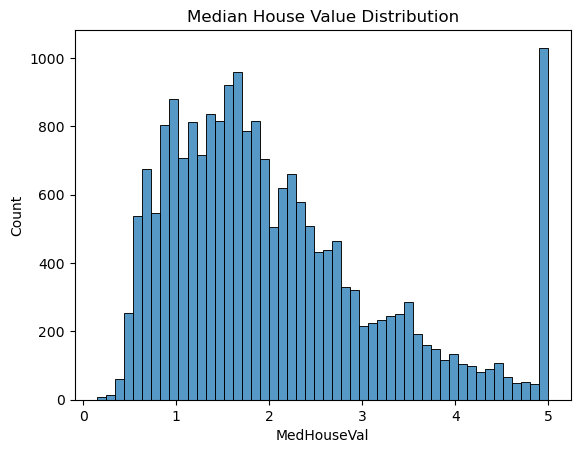

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(housing["MedHouseVal"], bins=50)
plt.title("Median House Value Distribution")
plt.show()

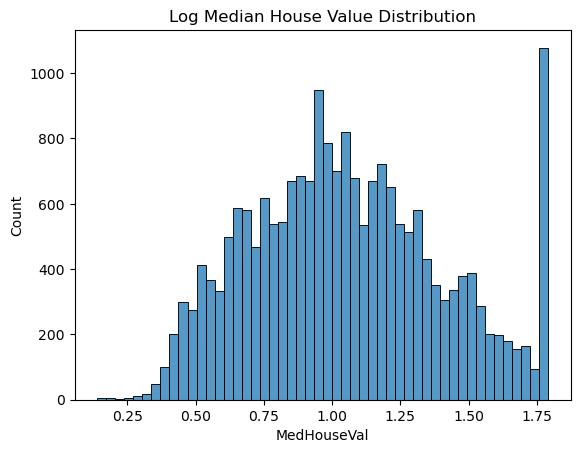

In [6]:
sns.histplot(np.log1p(housing["MedHouseVal"]), bins=50)
plt.title("Log Median House Value Distribution")
plt.show()

In [7]:
# HouseAge: Does old vs new housing matter?

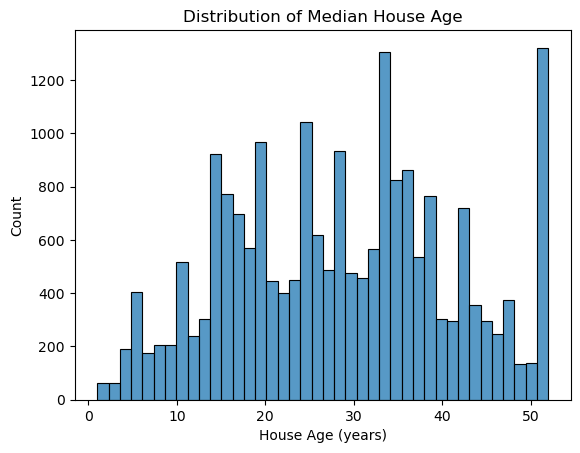

In [8]:
sns.histplot(housing["HouseAge"], bins=40)
plt.title("Distribution of Median House Age")
plt.xlabel("House Age (years)")
plt.show()

In [9]:
# HouseAge vs price

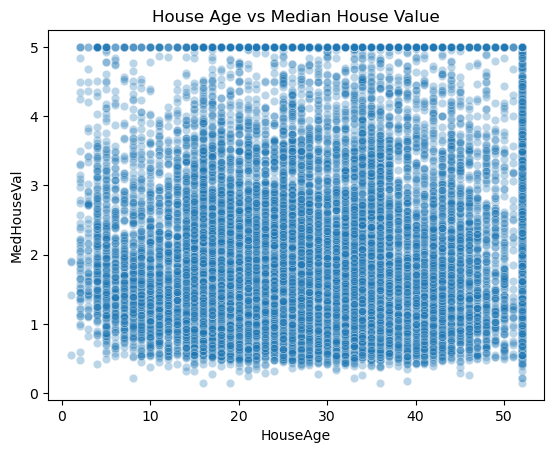

In [10]:
sns.scatterplot(
    data=housing,
    x="HouseAge",
    y="MedHouseVal",
    alpha=0.3
)
plt.title("House Age vs Median House Value")
plt.show()

In [11]:
# Distribution of rooms

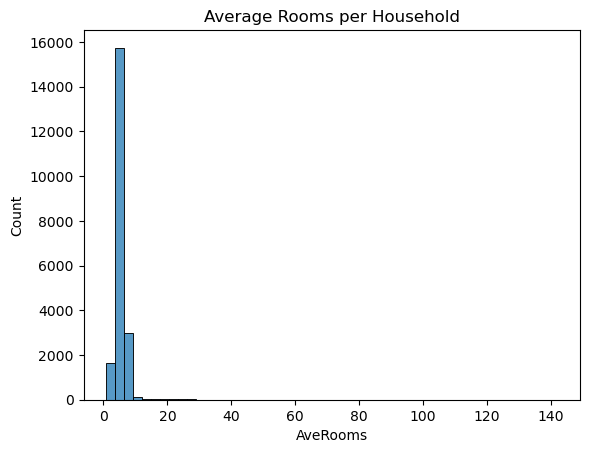

In [12]:
sns.histplot(housing["AveRooms"], bins=50)
plt.title("Average Rooms per Household")
plt.show()

In [13]:
# Rooms vs price

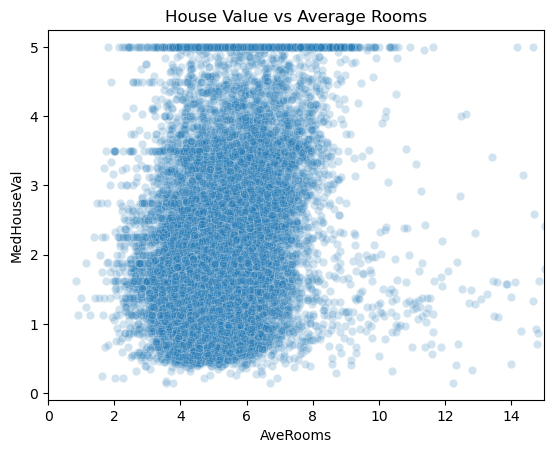

In [14]:
sns.scatterplot(
    data=housing,
    x="AveRooms",
    y="MedHouseVal",
    alpha=0.2
)
plt.xlim(0, 15)
plt.title("House Value vs Average Rooms")
plt.show()

In [15]:
# Bedrooms as a ratio, not absolute

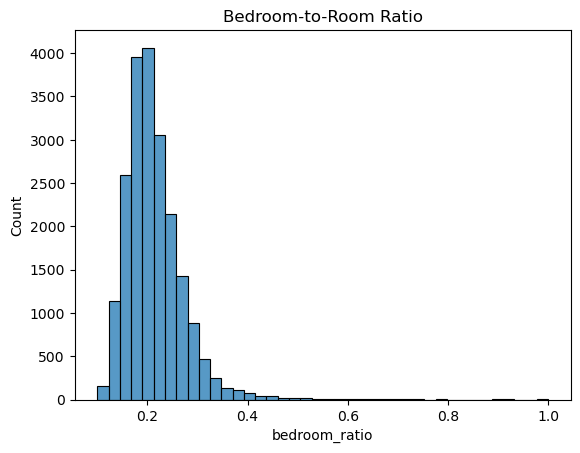

In [16]:
housing["bedroom_ratio"] = housing["AveBedrms"] / housing["AveRooms"]

sns.histplot(housing["bedroom_ratio"], bins=40)
plt.title("Bedroom-to-Room Ratio")
plt.show()

In [17]:
# Bedroom ratio vs price

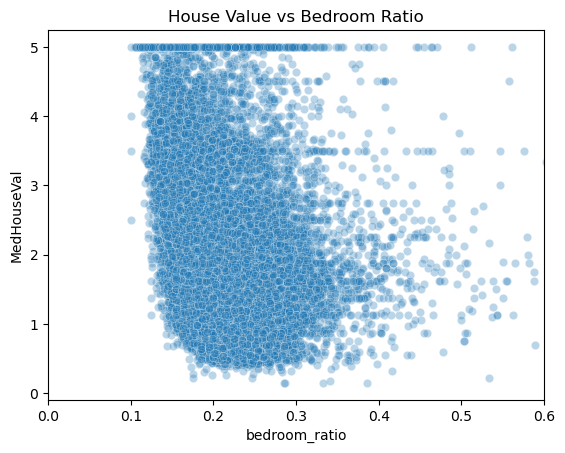

In [18]:
sns.scatterplot(
    data=housing,
    x="bedroom_ratio",
    y="MedHouseVal",
    alpha=0.3
)
plt.xlim(0, 0.6)
plt.title("House Value vs Bedroom Ratio")
plt.show()

In [19]:
# Houses optimized for sleeping (crowding) are cheaper than houses optimized for space and comfort.

In [20]:
# Geography first (always)
# Scatter: Longitude × Latitude colored by price

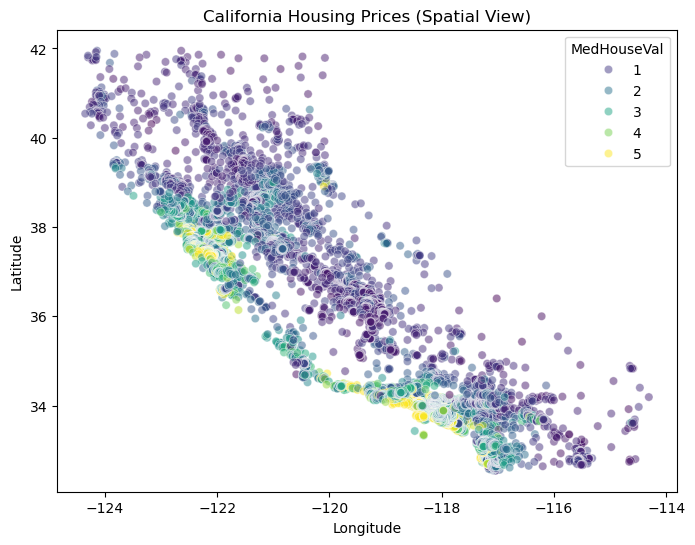

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=housing,
    x="Longitude",
    y="Latitude",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5
)
plt.title("California Housing Prices (Spatial View)")
plt.show()

In [22]:
# Core economic relationship: income × housing

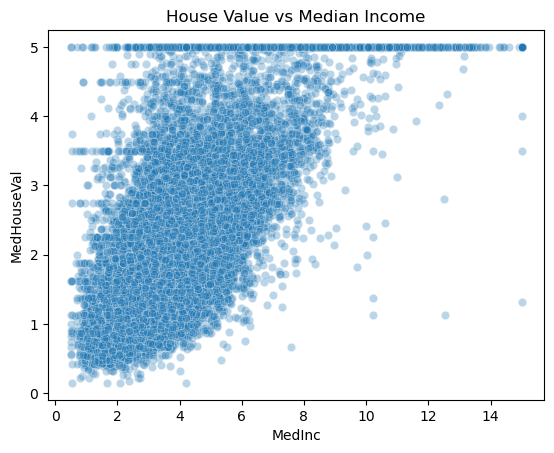

In [23]:
sns.scatterplot(
    data=housing,
    x="MedInc",
    y="MedHouseVal",
    alpha=0.3
)
plt.title("House Value vs Median Income")
plt.show()

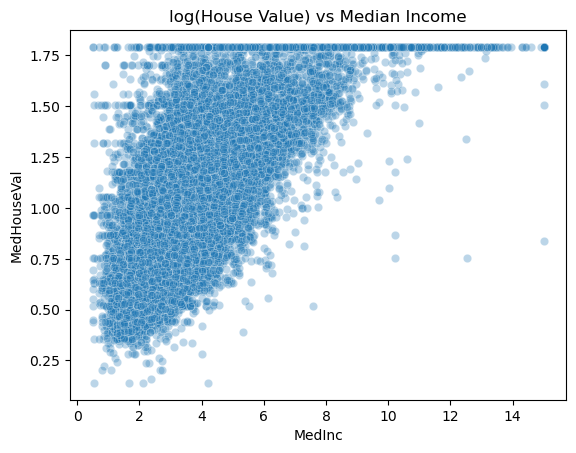

In [24]:
sns.scatterplot(
    data=housing,
    x="MedInc",
    y=np.log1p(housing["MedHouseVal"]),
    alpha=0.3
)
plt.title("log(House Value) vs Median Income")
plt.show()

In [25]:
# Coastal vs inland (rough proxy)

In [26]:
housing["coastal"] = housing["Longitude"] > -122

housing.groupby("coastal")["MedHouseVal"].describe()

,count,mean,std,min,25%,50%,75%,max
coastal,,,,,,,,
False,4034.0,2.444295,1.276381,0.14999,1.41525,2.2725,3.32475,5.00001
True,16606.0,1.977283,1.103087,0.14999,1.16400,1.7165,2.47600,5.00001


#### California housing prices exhibit strong spatial inequality, with geography exerting a dominant influence over value. 

#### While median income explains a significant portion of price variation, location-based effects—particularly coastal proximity—introduce sharp discontinuities that income alone cannot account for.

In [27]:
# Gini of housing prices (baseline)

In [28]:
def gini(x):
    x = np.asarray(x, dtype=float)
    x = x[x >= 0]
    x = np.sort(x)
    n = len(x)
    if n == 0:
        return np.nan
    cumx = np.cumsum(x)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

gini_house = gini(housing["MedHouseVal"])
gini_house

0.3043854858887777

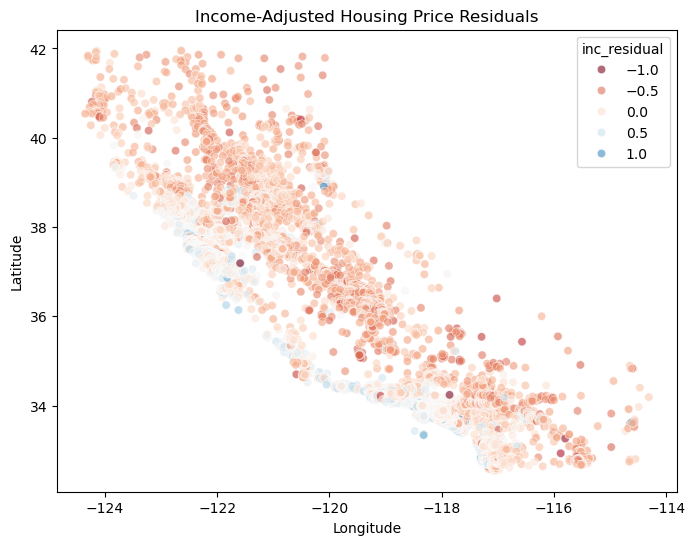

In [29]:
# Residualize prices by income

housing["log_price"] = np.log1p(housing["MedHouseVal"])
housing["log_inc"] = np.log1p(housing["MedInc"])

coef = np.polyfit(housing["log_inc"], housing["log_price"], 1)
housing["log_price_hat"] = coef[0] * housing["log_inc"] + coef[1]
housing["inc_residual"] = housing["log_price"] - housing["log_price_hat"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=housing,
    x="Longitude",
    y="Latitude",
    hue="inc_residual",
    palette="RdBu",
    alpha=0.6
)
plt.title("Income-Adjusted Housing Price Residuals")
plt.show()

In [30]:
# coastal metros remain overpriced

# inland areas remain underpriced

In [31]:
# Population distribution

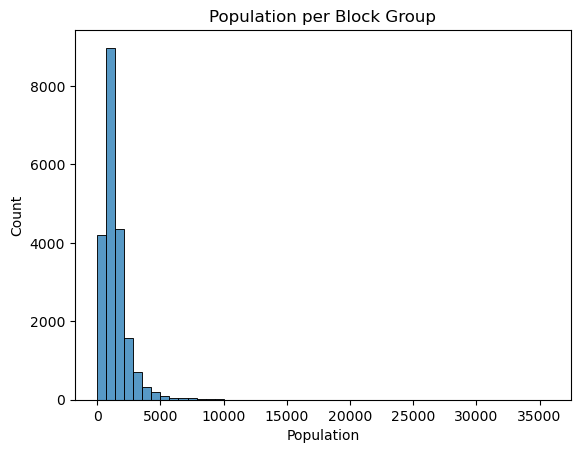

In [32]:
sns.histplot(housing["Population"], bins=50)
plt.title("Population per Block Group")
plt.show()

In [33]:
# Population vs price

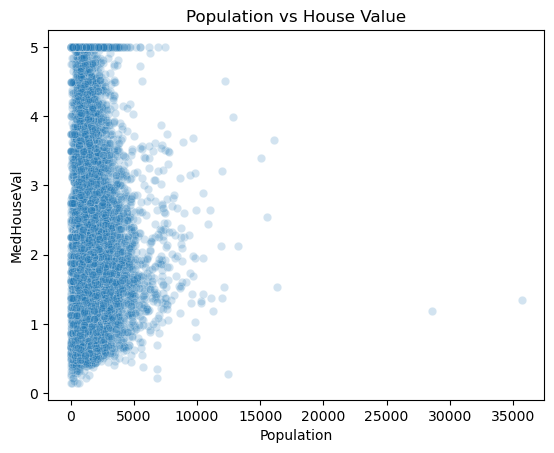

In [34]:
sns.scatterplot(
    data=housing,
    x="Population",
    y="MedHouseVal",
    alpha=0.2
)
plt.title("Population vs House Value")
plt.show()

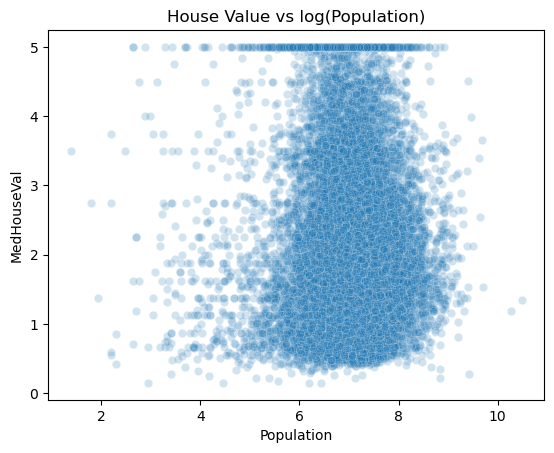

In [35]:
sns.scatterplot(
    data=housing,
    x=np.log1p(housing["Population"]),
    y=housing["MedHouseVal"],
    alpha=0.2
)
plt.title("House Value vs log(Population)")
plt.show()

In [36]:
# Average occupancy

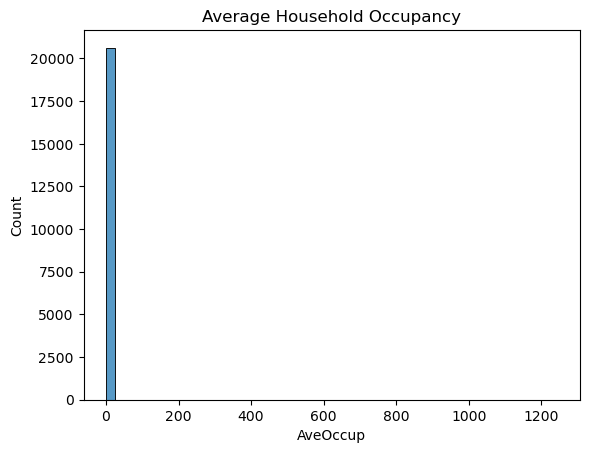

In [37]:
sns.histplot(housing["AveOccup"], bins=50)
plt.title("Average Household Occupancy")
plt.show()

In [38]:
# Crowding: AveOccup

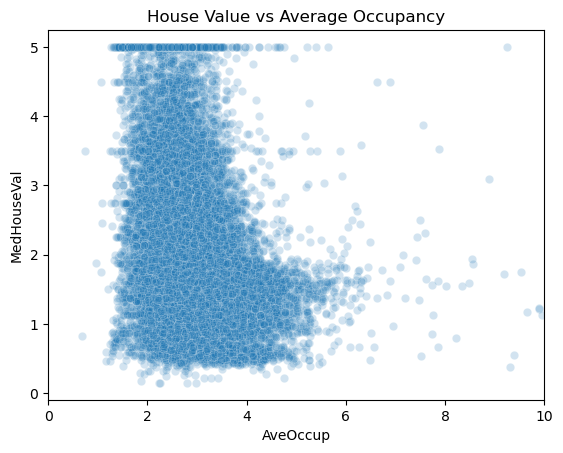

In [39]:
sns.scatterplot(
    data=housing,
    x="AveOccup",
    y="MedHouseVal",
    alpha=0.2
)
plt.xlim(0, 10)
plt.title("House Value vs Average Occupancy")
plt.show()

In [40]:
# Correlation heatmap (log where appropriate)

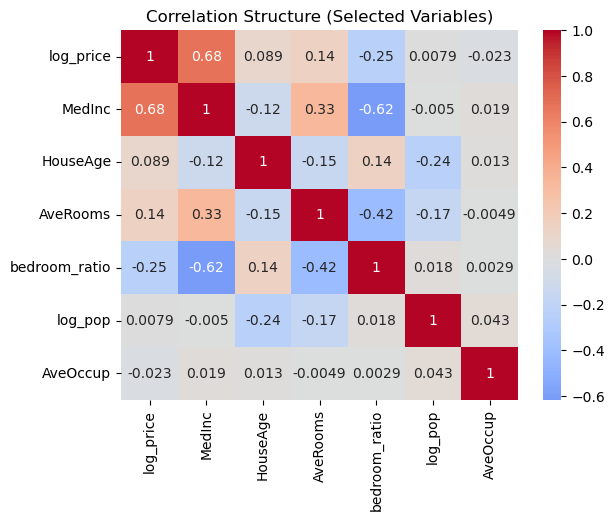

In [41]:
corr_df = housing.copy()
corr_df["log_price"] = np.log1p(corr_df["MedHouseVal"])
corr_df["log_pop"] = np.log1p(corr_df["Population"])

sns.heatmap(
    corr_df[[
        "log_price", "MedInc", "HouseAge",
        "AveRooms", "bedroom_ratio",
        "log_pop", "AveOccup"
    ]].corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Structure (Selected Variables)")
plt.show()

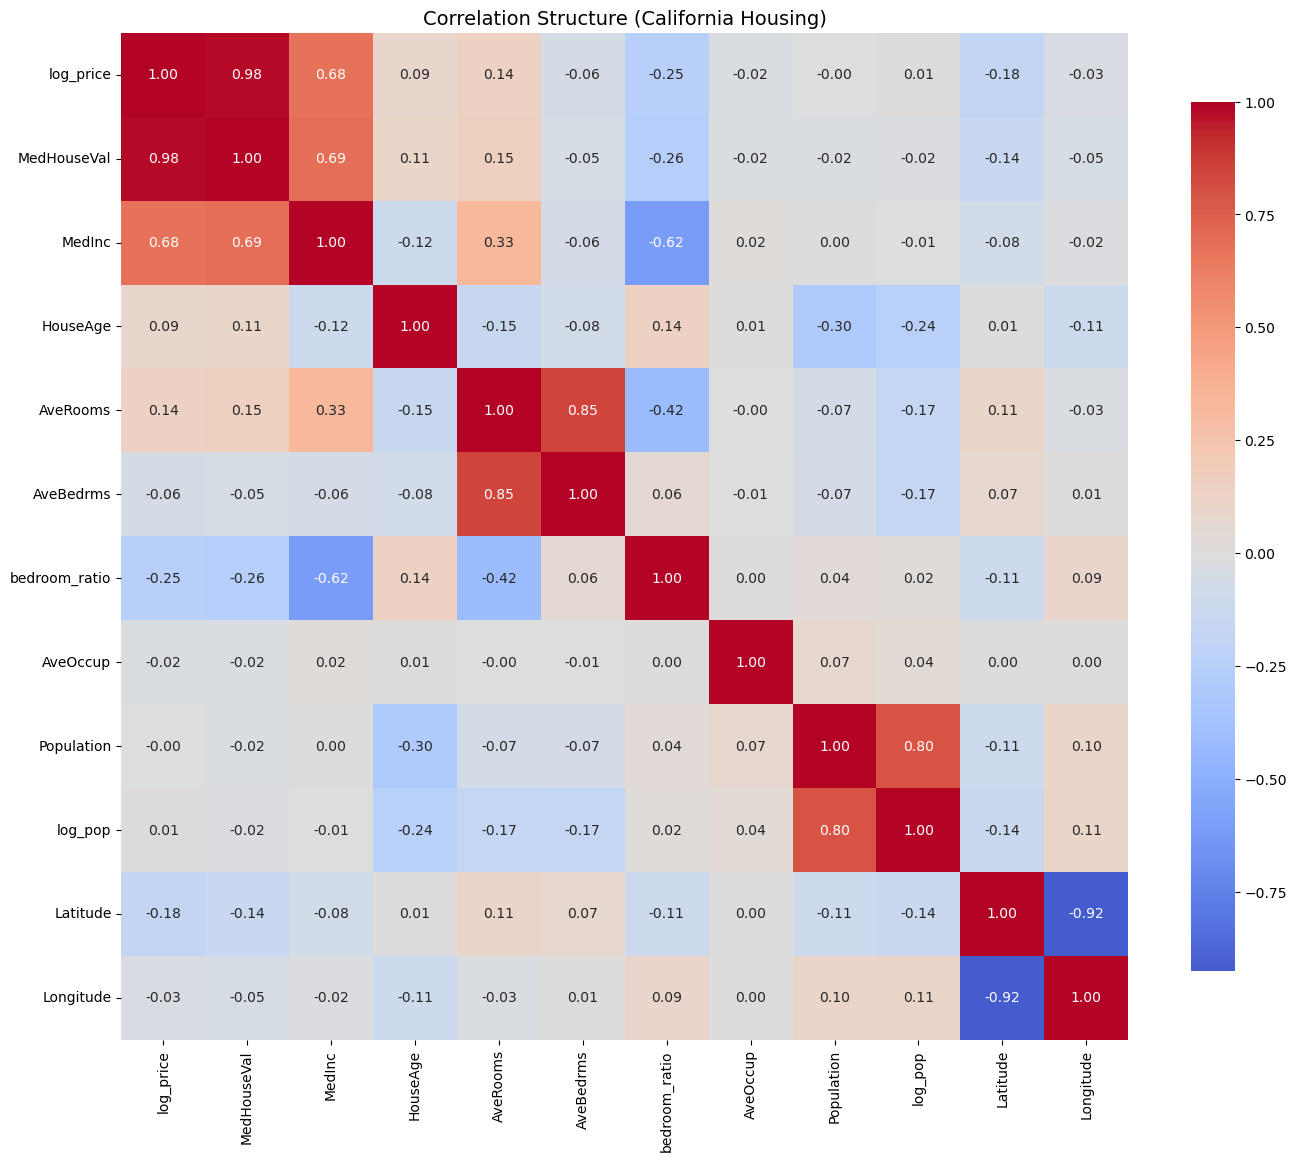

In [42]:
corr_df = housing.copy()
corr_df["log_price"] = np.log1p(corr_df["MedHouseVal"])
corr_df["log_pop"] = np.log1p(corr_df["Population"])

cols = [
    "log_price", "MedHouseVal", "MedInc",
    "HouseAge", "AveRooms", "AveBedrms",
    "bedroom_ratio", "AveOccup",
    "Population", "log_pop",
    "Latitude", "Longitude"
]

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_df[cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Structure (California Housing)", fontsize=14)
plt.tight_layout()
plt.show()

#### Markets price objects with remarkable consistency, but when pricing people or places, structural factors—such as identity or geography—introduce persistent residual inequalities even after controlling for fundamentals.

#### California housing prices are shaped not only by income and geography, but also by qualitative features of living space. 

#### Crowding indicators—such as high household occupancy and high bedroom-to-room ratios—are systematically associated with lower house values, while sheer size or age alone offers limited explanatory power. 

#### The market prices space, comfort, and location more consistently than density or population.